#### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

BoomBikes, a US bike-sharing company, is facing significant revenue decline due to the COVID-19 pandemic. To recover and thrive post-pandemic, they aim to understand and predict the demand for shared bikes in the American market.

#### Objective:
1. Identify key factors influencing bike-sharing demand.
2. Build a predictive model to estimate bike demand based on these factors.

In [127]:
# Import required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

# Set display row and column limit
pd.set_option("display.max_columns",300)
pd.set_option("display.max_rows",300)

In [128]:
# Get version info for used libraries
import matplotlib
import sklearn
import statsmodels

print(np.__version__)
print(pd.__version__)
print(sns.__version__)
print(matplotlib.__version__)
print(sklearn.__version__)
print(statsmodels.__version__)

2.0.2
2.2.2
0.13.2
3.9.2
1.5.1
0.14.4


In [129]:
# reading data set
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [130]:
#No of rows and columns
df.shape

(730, 16)

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [132]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [133]:
# check for null/empty values
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [134]:
# check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


From problem statement, We know that there are some categorical columns so identify n unique counts in each columns

In [135]:
# print columns which has less than 20 unique values
count = 20
for col in df.columns:
    # Count the number of unique values
    unique_values_count = df[col].nunique()
    
    if unique_values_count < count:
        print(f"Value counts for '{col}':\n{df[col].value_counts()}\n")

Value counts for 'season':
season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

Value counts for 'yr':
yr
0    365
1    365
Name: count, dtype: int64

Value counts for 'mnth':
mnth
1     62
3     62
7     62
5     62
12    62
10    62
8     62
4     60
9     60
6     60
11    60
2     56
Name: count, dtype: int64

Value counts for 'holiday':
holiday
0    709
1     21
Name: count, dtype: int64

Value counts for 'weekday':
weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64

Value counts for 'workingday':
workingday
1    499
0    231
Name: count, dtype: int64

Value counts for 'weathersit':
weathersit
1    463
2    246
3     21
Name: count, dtype: int64



As we can see there are categorical variables which has less distinct values -

'season'

'yr'

'mnth'

'holiday'

'weekday'

'workingday'

'weathersit'

In [136]:
cat_columns = ['season','yr','mnth','holiday','weekday', 'workingday','weathersit']

# convert these into categorical columns
df[cat_columns] = df[cat_columns].astype('category')

In [137]:
df.describe(include=['category'])

,season,yr,mnth,holiday,weekday,workingday,weathersit
count,730,730,730,730,730,730,730
unique,4,2,12,2,7,2,3
top,3,0,1,0,0,1,1
freq,188,365,62,709,105,499,463


we can drop few columns which are either highly correlated with other feature or not playing role 
in prediction

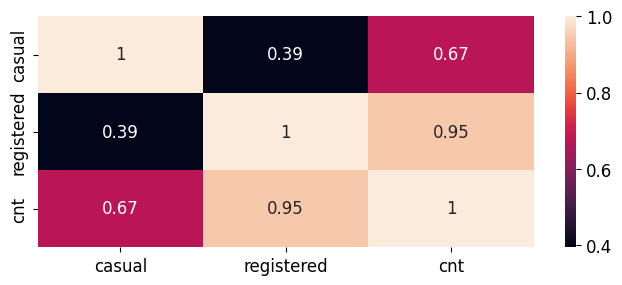

In [138]:

plt.figure(figsize=[8,3])
sns.heatmap(df[['casual','registered','cnt']].corr(),annot=True)
plt.show()

We can see there is high correlation among 'registered','casual' and cnt. And from 
data dictionary 'cnt' is sum of 'registered' and 'casual'.
so we can remove these

As per unique value of 'Instant' column (730 entries) - this is just id so we can remove this
we have year & month so we can remove 'dteday'


As per my assumption we should have only one value - 'temp' & 'atemp'. Lets check correlation between them

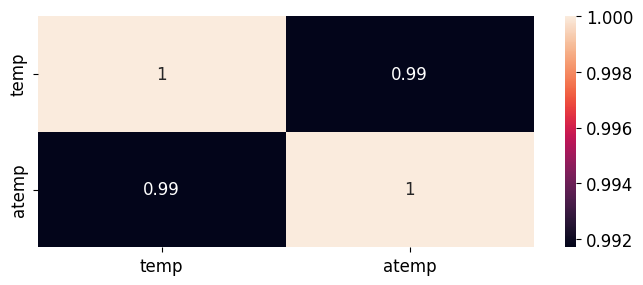

In [139]:
plt.figure(figsize=[8,3])
sns.heatmap(df[['temp','atemp']].corr(),annot=True)
plt.show()

'temp' and 'atemp' are highly corelated so we can remove them.
As per data dictionary it was clear that both are same but this heatmap proved that

In [140]:
drop_columns = ['instant', 'dteday','casual','registered','atemp']

df.drop(drop_columns, axis=1, inplace=True)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
dtypes: category(7), float64(3), int64(1)
memory usage: 29.4 KB


In [142]:
df.describe(include=['category'])

,season,yr,mnth,holiday,weekday,workingday,weathersit
count,730,730,730,730,730,730,730
unique,4,2,12,2,7,2,3
top,3,0,1,0,0,1,1
freq,188,365,62,709,105,499,463


Now convert categorical variables (uniqu value > 2) as per data dictionary and then we will do encoding

In [143]:
df['season'] = df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

df['weekday'] = df['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed',
                                    4: 'Thu', 5: 'Fri', 6: 'Sat'})

df['mnth'] = df['mnth'].map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5: 'may', 
                             6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct',
                             11: 'nov', 12:'dec'})

df['weathersit'] = df['weathersit'].map({1: 'Clear_FewClouds',
                                          2: 'Mist_Cloudy', 3: 'LightSnow_LightRain', 
                                          4: 'HeavyRain_IcePallets'})

Lets plot columns and try to find out insights

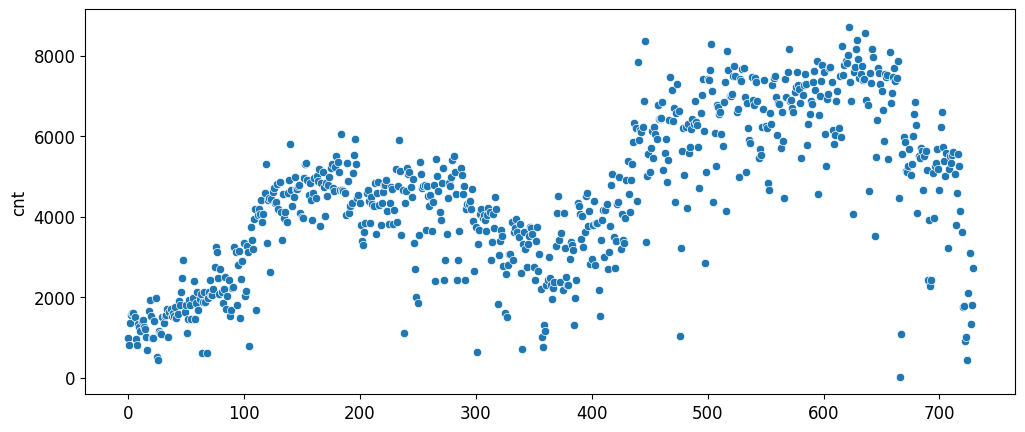

In [144]:
# draw 'cnt' over span of years for which have 

plt.figure(figsize=(12,5))
sns.scatterplot(df.cnt)
plt.show()

We can see growth in mid of year and then down.
we can see less demand at last which was also mentioned in problem statement

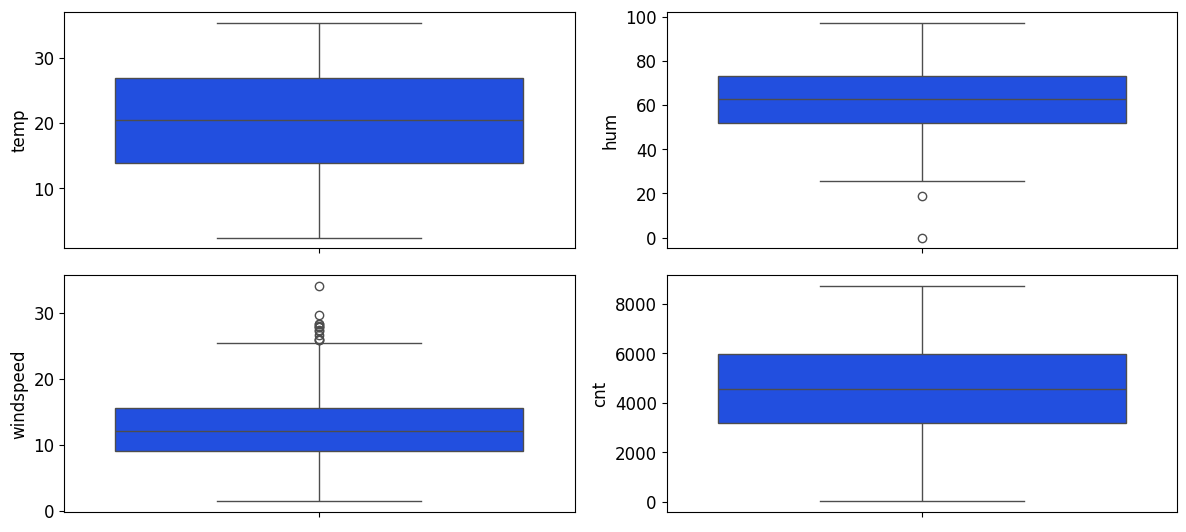

In [145]:
# Visualising numerical varibles
var = df.select_dtypes(exclude = 'category').columns

# Box plot
col = 2
row = len(var)//col+1

plt.figure(figsize=(12,8))
plt.rc('font', size=12)


for i in list(enumerate(var)):
    plt.subplot(row, col, i[0]+1)
    sns.boxplot(data=df[i[1]],palette='bright')    
    plt.xticks(rotation = 90)

plt.tight_layout(pad=1)   
plt.show()

We can see 'windspeed' & 'hum' contains outliers but we would have to check percentage of outlier to keep or remove outliers

In [146]:
# we can create a method to get outliers percentage.
# Q1 = 0.25, Q3 = 0.75
# IQR = Q3 - Q1
# Lower = Q1 - 1.5 * IQR
# Higher = Q3 + 1.5 * IQR
# values below 'lower' & above 'higher' are outliers

def get_outlier_percentage(x):
    iqr = df[x].quantile(0.75)-df[x].quantile(0.25)
    HL = df[x].quantile(0.75)+iqr*1.5
    LL = df[x].quantile(0.25)-iqr*1.5
    per_outlier = ((df[x]<LL).sum()+(df[x]>HL).sum())/len(df[x])*100
    per_outlier = round(per_outlier,2)
    return(per_outlier)

In [147]:
print('outlier percentage of hum: ', get_outlier_percentage('hum'))
print('outlier percentage of windspeed: ', get_outlier_percentage('windspeed'))

outlier percentage of hum:  0.27
outlier percentage of windspeed:  1.78


Both outlier percentage are not much so we can keep it as it is

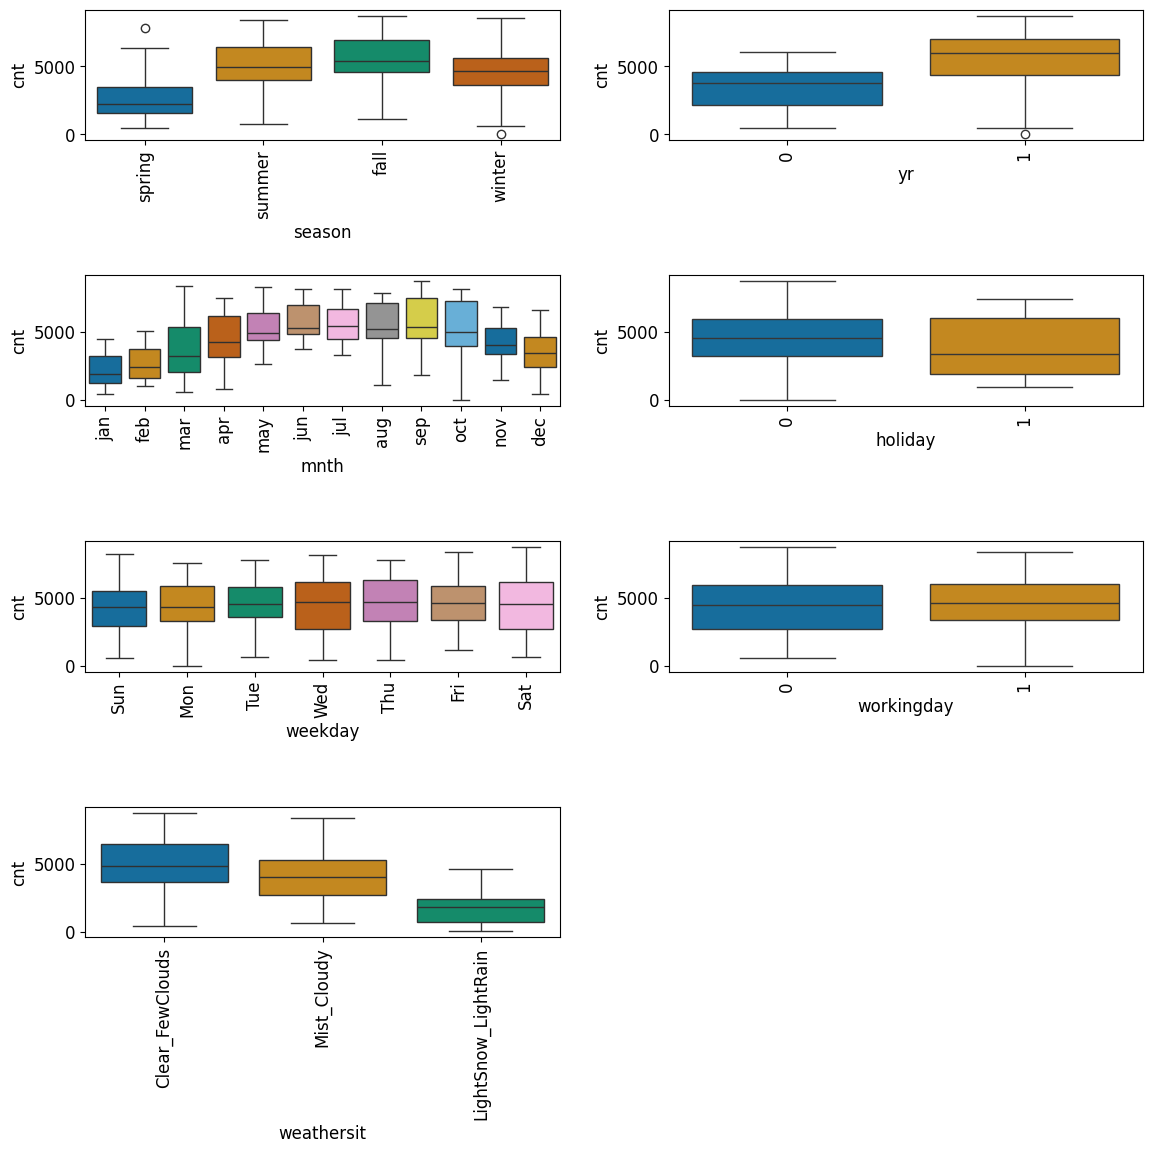

In [148]:
# Box plot for categorical variables
# for drawing categorical variable we are taking cnt in y axis to see value difference in different
# categories

col = 2
row = len(cat_columns)//col+1
plt.figure(figsize=(12,12))
plt.rc('font', size=12)

for i in list(enumerate(cat_columns)):
    plt.subplot(row,col,i[0]+1)
    sns.boxplot(x = i[1], y = 'cnt', data = df,palette='colorblind')
    plt.xticks(rotation = 90)

plt.tight_layout(pad = 2)    
plt.show()

Insights -

1. The highest number of bike-sharing activities occur during the fall season, while the lowest occurs in spring.
2. The bike-sharing count is higher in 2019 compared to 2018.
3. Bike-sharing activity increases during the mid-year months and decreases towards the end of the year.
4. The bike-sharing count is highest when the weather is clear or partly cloudy and lowest during light  snow or light rain conditions.
5. There is no significant difference in bike-sharing counts between working days and non-working days.
6. Bike-sharing counts remain consistent across all weekdays.
7. On holidays, there is a noticeable decline in the bike-sharing count.


<Figure size 640x480 with 0 Axes>

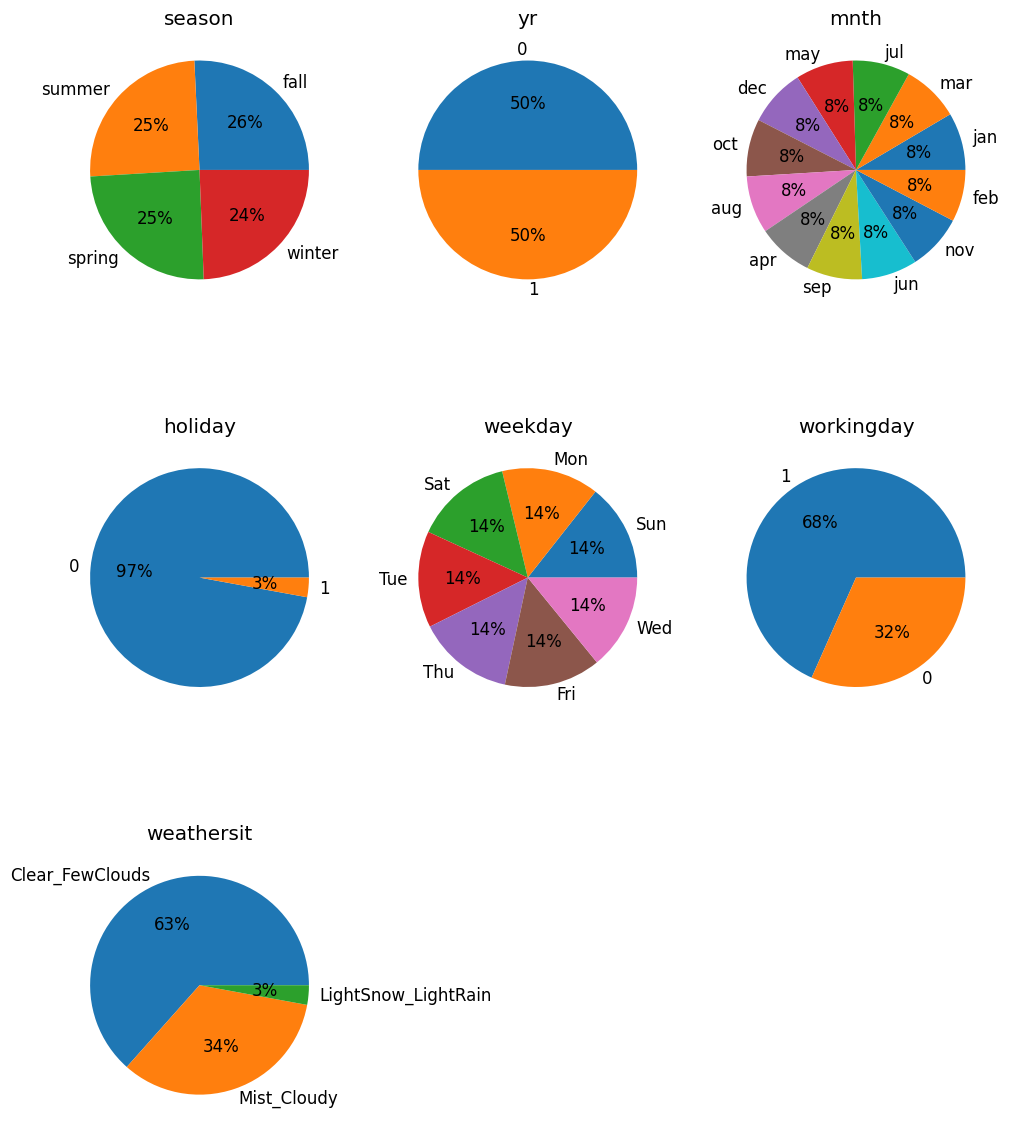

In [149]:
# # # Draw Pie chart for categorical columns

df_piplot=df.select_dtypes(include='category')
col = 3
row = len(cat_columns)//col+1
plt.suptitle('Pie distribution of categorical columns', fontsize=20)
plt.figure(figsize=(12,15))
plt.rc('font', size=12)

for idx, col_name in enumerate(cat_columns):
    plt.subplot(row, col, idx + 1)
    plt.gca().set_title(col_name)
    
    values = df_piplot[col_name].value_counts(normalize=True).values
    labels = df_piplot[col_name].value_counts(normalize=True).index
    plt.pie(values, labels=labels, autopct='%1.0f%%')    

plt.show()

The data distribution is nearly uniform across the features 'season,' 'year,' 'month,' and 'weekday', indicating equal proportions.


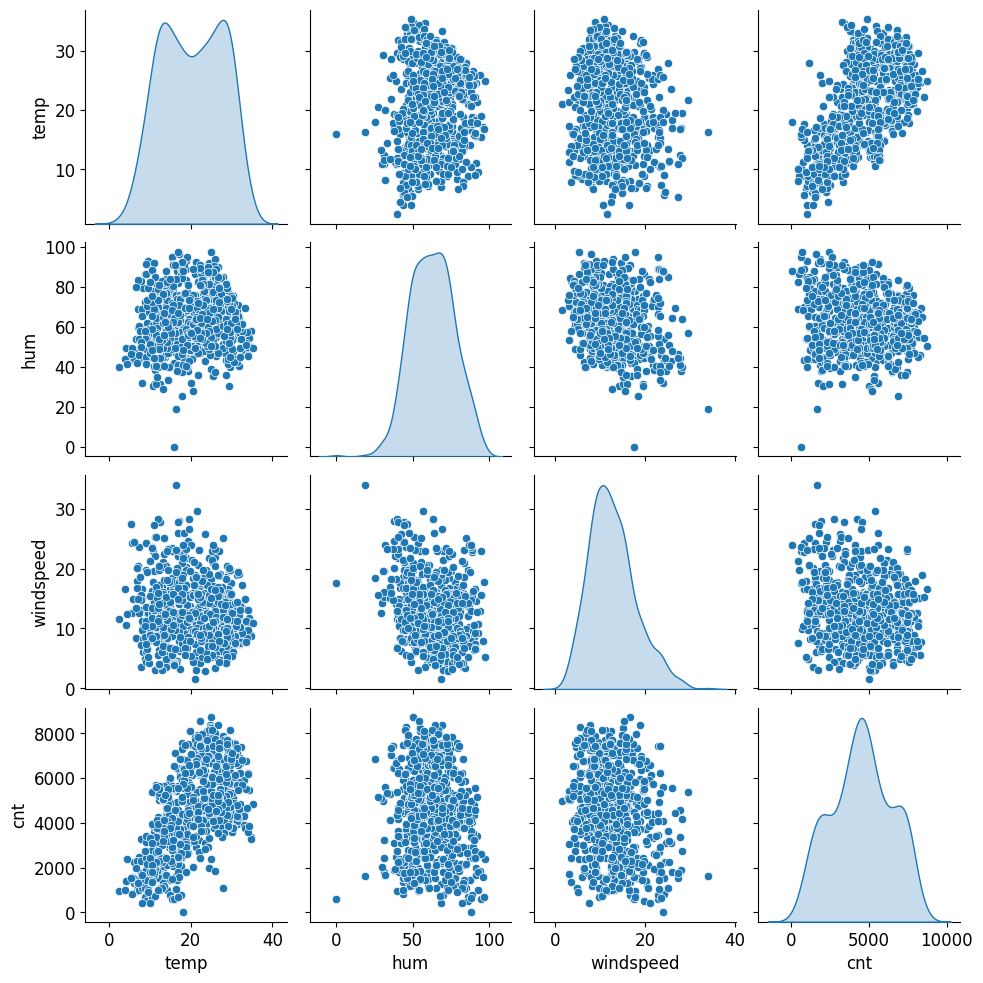

In [150]:
# pairplot for continuous data type
sns.pairplot(df.select_dtypes(['int64','float64']), diag_kind='kde')
plt.show()

From the above pairplot we could observe that, 'temp' has highest positive correlation with target variable 'cnt'.


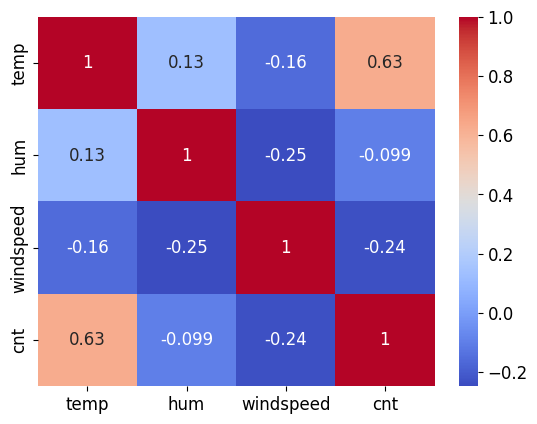

In [151]:
# correaltion  using heat map
sns.heatmap(df.select_dtypes(exclude=['category']).corr(), annot=True, cmap='coolwarm')
plt.show()

A positive correalation observed between 'cnt' and 'temp' (0.63)

A Negative correlation observed for 'cnt' with 'hum' and 'windspeed' (-0.099 and -0.24)

In [152]:
# get dummy variables for 'season', 'weekday', 'mnth' and 'weathersit'
dummy_vars = pd.get_dummies(df[['season','weekday','mnth','weathersit']],drop_first=True)

# concat the dummy df with original df
df = pd.concat([df,dummy_vars], axis = 1)

# drop season column
df.drop(['season','weekday','mnth','weathersit'], axis=1, inplace=True)

# Convert categorical columns to numeric 
df[['yr','holiday','workingday']]= df[['yr','holiday','workingday']].astype('uint8')

df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,mnth_feb,mnth_mar,mnth_apr,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
0,0,0,0,14.110847,80.5833,10.749882,985,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
1,0,0,0,14.902598,69.6087,16.652113,801,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,0,0,1,8.050924,43.7273,16.636703,1349,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,0,0,1,8.200000,59.0435,10.739832,1562,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,0,0,1,9.305237,43.6957,12.522300,1600,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [153]:
df[['yr','holiday','workingday']]= df[['yr','holiday','workingday']].astype('uint8')

Now we have done most of the required EDA things, now time for create model and test


In [154]:
# Split train test dataset
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 10 )
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


During EDA we could observe that there is different range of data in the data set. So it becomes important to scale the data.

Here we will be using Min-Max scaling (normalisation) to scale both training and tesing dataset.

In [155]:
scaler = MinMaxScaler()

# fit and transform on training data
num_columns = ['temp', 'hum','windspeed','cnt']
df_train[num_columns] = scaler.fit_transform(df_train[num_columns])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,mnth_feb,mnth_mar,mnth_apr,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
72,0,0,1,0.298094,0.393891,0.236118,0.194978,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
510,1,0,0,0.778657,0.694105,0.364071,0.737052,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False
700,1,0,0,0.327249,0.809877,0.210252,0.509236,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
264,0,0,1,0.694699,0.910249,0.217975,0.526862,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
577,1,0,1,0.811368,0.624004,0.244886,0.863093,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [156]:
# transform test dataset 
# we must be careful that on test data we do just 'transform' and 'fit_transform' for training data
df_test[num_columns] = scaler.transform(df_test[num_columns])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,mnth_feb,mnth_mar,mnth_apr,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
566,1,0,0,0.652175,0.863516,0.393568,0.486297,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True
374,1,0,1,0.276477,0.584521,0.340487,0.382349,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
181,0,0,1,0.817910,0.265533,0.165370,0.595316,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False
529,1,0,1,0.720868,0.486457,0.476922,0.836895,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
233,0,0,1,0.777567,0.359532,0.524373,0.522395,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [157]:
# Creating X and y data dataframe for train set
y_train = df_train.pop('cnt')
X_train = df_train
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_summer,season_fall,season_winter,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,mnth_feb,mnth_mar,mnth_apr,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
72,0,0,1,0.298094,0.393891,0.236118,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
510,1,0,0,0.778657,0.694105,0.364071,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False
700,1,0,0,0.327249,0.809877,0.210252,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
264,0,0,1,0.694699,0.910249,0.217975,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
577,1,0,1,0.811368,0.624004,0.244886,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [158]:
# Creating X and y data dataframe for test set
y_test = df_test.pop('cnt')
X_test = df_test
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_summer,season_fall,season_winter,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,mnth_feb,mnth_mar,mnth_apr,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
566,1,0,0,0.652175,0.863516,0.393568,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True
374,1,0,1,0.276477,0.584521,0.340487,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
181,0,0,1,0.817910,0.265533,0.165370,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False
529,1,0,1,0.720868,0.486457,0.476922,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
233,0,0,1,0.777567,0.359532,0.524373,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [159]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_fall', 'season_winter', 'weekday_Mon',
       'weekday_Tue', 'weekday_Wed', 'weekday_Thu', 'weekday_Fri',
       'weekday_Sat', 'mnth_feb', 'mnth_mar', 'mnth_apr', 'mnth_may',
       'mnth_jun', 'mnth_jul', 'mnth_aug', 'mnth_sep', 'mnth_oct', 'mnth_nov',
       'mnth_dec', 'weathersit_Mist_Cloudy', 'weathersit_LightSnow_LightRain'],
      dtype='object')

We will use a mixed approach to build the model. Here we are using RFE approach for feature selection and then we will use the statsmodel approach for building the model

Feature Selection
We start with 20 variables.

In [160]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

# Select columns
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_fall', 'season_winter', 'weekday_Sat',
       'mnth_feb', 'mnth_mar', 'mnth_apr', 'mnth_may', 'mnth_jun', 'mnth_aug',
       'mnth_sep', 'mnth_oct', 'weathersit_Mist_Cloudy',
       'weathersit_LightSnow_LightRain'],
      dtype='object')

In [161]:
X_train_rfe = X_train[col]

Convert bool type to integer

In [162]:
X_train_rfe = X_train_rfe.astype({col: int for col in X_train_rfe.select_dtypes(include=['bool']).columns})

In [163]:
# create function for stats linear model  and function to calculate VIF
def sm_linearmodel(X_train_sm):
    X_train_sm = sm.add_constant(X_train_sm)
    lm = sm.OLS(y_train,X_train_sm).fit()
    return lm

In [164]:
def vif_calc(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF', ascending = False)
    return vif

In [165]:
lm_1 = sm_linearmodel(X_train_rfe)
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     139.6
Date:                Mon, 16 Dec 2024   Prob (F-statistic):          1.75e-187
Time:                        17:31:07   Log-Likelihood:                 498.26
No. Observations:                 510   AIC:                            -954.5
Df Residuals:                     489   BIC:                            -865.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [166]:
# # Calculate VIF
print(vif_calc(X_train_rfe))

                          Features    VIF
3                             temp  23.72
4                              hum  14.02
6                    season_summer   8.66
7                      season_fall   8.09
2                       workingday   5.38
5                        windspeed   4.66
13                        mnth_may   4.13
12                        mnth_apr   3.99
8                    season_winter   3.75
14                        mnth_jun   2.70
18          weathersit_Mist_Cloudy   2.37
0                               yr   2.03
9                      weekday_Sat   1.95
15                        mnth_aug   1.87
11                        mnth_mar   1.86
16                        mnth_sep   1.68
17                        mnth_oct   1.63
10                        mnth_feb   1.53
19  weathersit_LightSnow_LightRain   1.40
1                          holiday   1.23


In [167]:
# Loop to remove P value variables >0.05 and update model
pvalue = lm_1.pvalues

while(max(pvalue)>0.05):
    maxp_var = pvalue[pvalue == pvalue.max()].index
    print('Removed variable:' , maxp_var[0], '    P value: ', round(max(pvalue),3))
    # drop variable with high p value
    X_train_rfe = X_train_rfe.drop(maxp_var, axis = 1)
    lm_1 = sm_linearmodel(X_train_rfe)
    pvalue = lm_1.pvalues

Removed variable: mnth_feb     P value:  0.222


In [168]:
# Look for sumamry of model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     146.7
Date:                Mon, 16 Dec 2024   Prob (F-statistic):          2.99e-188
Time:                        17:31:07   Log-Likelihood:                 497.48
No. Observations:                 510   AIC:                            -955.0
Df Residuals:                     490   BIC:                            -870.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [169]:
# Calculate VIF
print(vif_calc(X_train_rfe))

                          Features    VIF
3                             temp  23.47
4                              hum  13.78
6                    season_summer   8.54
7                      season_fall   7.41
2                       workingday   5.30
5                        windspeed   4.38
12                        mnth_may   4.02
11                        mnth_apr   3.89
8                    season_winter   3.14
13                        mnth_jun   2.64
17          weathersit_Mist_Cloudy   2.36
0                               yr   2.01
9                      weekday_Sat   1.93
14                        mnth_aug   1.87
10                        mnth_mar   1.70
15                        mnth_sep   1.67
16                        mnth_oct   1.63
18  weathersit_LightSnow_LightRain   1.39
1                          holiday   1.23


As we can see 'temp' has high VIF value but we can see in heatmap it has highest correlation so we would not delete it. we will take second element

In [170]:
# drop varible having high VIF
X_train_new = X_train_rfe.drop(['hum'],axis = 1)

# Create stats model and look for summary
lm_2 = sm_linearmodel(X_train_new)
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     147.0
Date:                Mon, 16 Dec 2024   Prob (F-statistic):          1.71e-184
Time:                        17:31:07   Log-Likelihood:                 485.79
No. Observations:                 510   AIC:                            -933.6
Df Residuals:                     491   BIC:                            -853.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [171]:
# Calculate VIF
print(vif_calc(X_train_new))

                          Features    VIF
3                             temp  18.31
5                    season_summer   8.54
6                      season_fall   7.18
2                       workingday   4.87
4                        windspeed   4.32
11                        mnth_may   4.02
10                        mnth_apr   3.89
7                    season_winter   3.06
12                        mnth_jun   2.60
0                               yr   2.01
13                        mnth_aug   1.87
8                      weekday_Sat   1.84
9                         mnth_mar   1.70
14                        mnth_sep   1.66
15                        mnth_oct   1.62
16          weathersit_Mist_Cloudy   1.59
1                          holiday   1.20
17  weathersit_LightSnow_LightRain   1.13


In [172]:
# drop varible having high VIF
X_train_new = X_train_new.drop(['season_summer'],axis = 1)

# Create stats model and look for summary
lm_3 = sm_linearmodel(X_train_new)

print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     149.5
Date:                Mon, 16 Dec 2024   Prob (F-statistic):          8.52e-182
Time:                        17:31:07   Log-Likelihood:                 476.67
No. Observations:                 510   AIC:                            -917.3
Df Residuals:                     492   BIC:                            -841.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [173]:
# Calculate VIF
print(vif_calc(X_train_new))

                          Features    VIF
3                             temp  16.87
5                      season_fall   6.08
2                       workingday   4.87
4                        windspeed   4.29
6                    season_winter   2.92
10                        mnth_may   2.23
0                               yr   2.01
11                        mnth_jun   1.88
7                      weekday_Sat   1.84
12                        mnth_aug   1.84
9                         mnth_apr   1.74
13                        mnth_sep   1.64
14                        mnth_oct   1.61
15          weathersit_Mist_Cloudy   1.58
8                         mnth_mar   1.47
1                          holiday   1.20
16  weathersit_LightSnow_LightRain   1.12


In [174]:
# drop varible having p value > 0.05 
X_train_new = X_train_new.drop(['mnth_may'],axis = 1)

# Create stats model and look for summary
lm_3 = sm_linearmodel(X_train_new)

print(lm_3.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     139.9
Date:                Mon, 16 Dec 2024   Prob (F-statistic):          1.70e-171
Time:                        17:31:07   Log-Likelihood:                 449.33
No. Observations:                 510   AIC:                            -864.7
Df Residuals:                     493   BIC:                            -792.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [175]:
# Calculate VIF
print(vif_calc(X_train_new))

                          Features   VIF
3                             temp  9.63
2                       workingday  4.86
4                        windspeed  4.27
5                      season_fall  4.08
6                    season_winter  2.30
0                               yr  2.00
7                      weekday_Sat  1.84
11                        mnth_aug  1.80
12                        mnth_sep  1.62
14          weathersit_Mist_Cloudy  1.58
13                        mnth_oct  1.57
10                        mnth_jun  1.45
9                         mnth_apr  1.37
8                         mnth_mar  1.28
1                          holiday  1.20
15  weathersit_LightSnow_LightRain  1.12


In [176]:
# drop varible having p value > 0.05 
X_train_new = X_train_new.drop(['mnth_aug'],axis = 1)

# Create stats model and look for summary
lm_3 = sm_linearmodel(X_train_new)

print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     148.4
Date:                Mon, 16 Dec 2024   Prob (F-statistic):          5.93e-172
Time:                        17:31:07   Log-Likelihood:                 447.81
No. Observations:                 510   AIC:                            -863.6
Df Residuals:                     494   BIC:                            -795.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [177]:
# drop varible having p value > 0.05 
X_train_new = X_train_new.drop(['weekday_Sat'],axis = 1)

# Create stats model and look for summary
lm_3 = sm_linearmodel(X_train_new)

print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     156.1
Date:                Mon, 16 Dec 2024   Prob (F-statistic):          2.85e-171
Time:                        17:31:07   Log-Likelihood:                 443.54
No. Observations:                 510   AIC:                            -857.1
Df Residuals:                     495   BIC:                            -793.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [178]:
print(vif_calc(X_train_new))

                          Features   VIF
3                             temp  8.85
4                        windspeed  3.83
5                      season_fall  3.35
2                       workingday  3.13
6                    season_winter  2.26
0                               yr  1.98
12          weathersit_Mist_Cloudy  1.56
11                        mnth_oct  1.56
9                         mnth_jun  1.38
10                        mnth_sep  1.37
8                         mnth_apr  1.37
7                         mnth_mar  1.27
13  weathersit_LightSnow_LightRain  1.12
1                          holiday  1.11


In [179]:
# List down final model varibales and its coefficients

lm_final = lm_3
var_final = list(lm_final.params.index)
var_final.remove('const')
print('Final Selected Variables:', var_final)
print('\nCoefficent for the variables are:')

print(round(lm_final.params,3))

Final Selected Variables: ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_fall', 'season_winter', 'mnth_mar', 'mnth_apr', 'mnth_jun', 'mnth_sep', 'mnth_oct', 'weathersit_Mist_Cloudy', 'weathersit_LightSnow_LightRain']

Coefficent for the variables are:
const                             0.096
yr                                0.251
holiday                          -0.090
workingday                        0.008
temp                              0.583
windspeed                        -0.150
season_fall                      -0.010
season_winter                     0.115
mnth_mar                          0.060
mnth_apr                          0.090
mnth_jun                          0.033
mnth_sep                          0.088
mnth_oct                          0.051
weathersit_Mist_Cloudy           -0.081
weathersit_LightSnow_LightRain   -0.268
dtype: float64


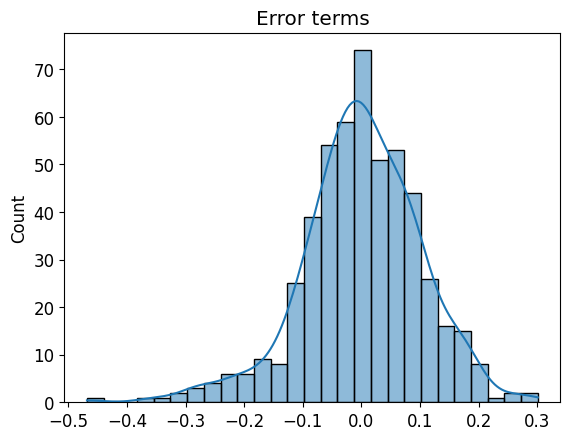

In [180]:
# Residual Analysis

X_train_res = X_train[var_final]
#Add constant
X_train_res = sm.add_constant(X_train_res)

# predict train set
y_train_pred = lm_final.predict(X_train_res)
# distrubition plot for residue

res = y_train - y_train_pred

sns.histplot(res,kde=True)
plt.title('Error terms')
plt.show()


Text(0, 0.5, 'Residual')

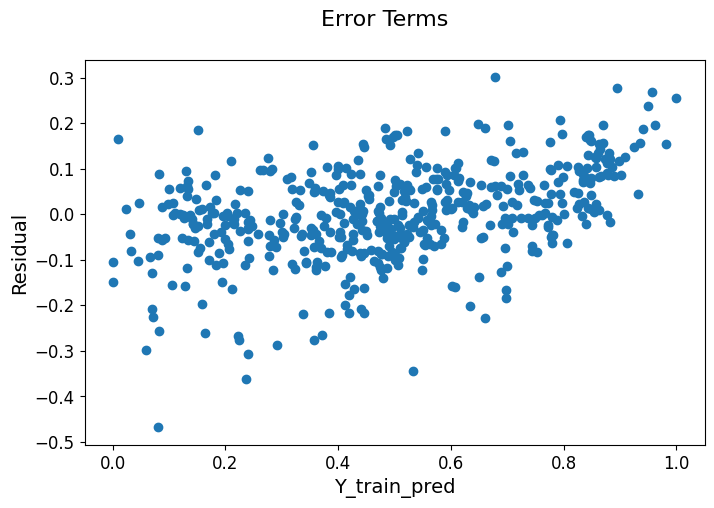

In [181]:
# The distribution plot of error term shows the normal distribution with mean at Zero.
# Error terms train set

fig = plt.figure(figsize=(8,5))
plt.scatter(y_train,res)
fig.suptitle('Error Terms', fontsize=16)              # Plot heading 
plt.xlabel('Y_train_pred', fontsize=14)               # X-label
plt.ylabel('Residual', fontsize=14)   

In [182]:
# select final variables from X_test
X_test_sm = X_test[var_final]
X_test_sm.head()

,yr,holiday,workingday,temp,windspeed,season_fall,season_winter,mnth_mar,mnth_apr,mnth_jun,mnth_sep,mnth_oct,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
566,1,0,0,0.652175,0.393568,True,False,False,False,False,False,False,False,True
374,1,0,1,0.276477,0.340487,False,False,False,False,False,False,False,False,False
181,0,0,1,0.817910,0.165370,True,False,False,False,False,False,False,False,False
529,1,0,1,0.720868,0.476922,False,False,False,False,True,False,False,False,False
233,0,0,1,0.777567,0.524373,True,False,False,False,False,False,False,False,False


In [183]:
# add constant
X_test_sm = sm.add_constant(X_test_sm)
X_test_sm.head()

,const,yr,holiday,workingday,temp,windspeed,season_fall,season_winter,mnth_mar,mnth_apr,mnth_jun,mnth_sep,mnth_oct,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
566,1.0,1,0,0,0.652175,0.393568,True,False,False,False,False,False,False,False,True
374,1.0,1,0,1,0.276477,0.340487,False,False,False,False,False,False,False,False,False
181,1.0,0,0,1,0.817910,0.165370,True,False,False,False,False,False,False,False,False
529,1.0,1,0,1,0.720868,0.476922,False,False,False,False,True,False,False,False,False
233,1.0,0,0,1,0.777567,0.524373,True,False,False,False,False,False,False,False,False


In [184]:
# predict test dataset
y_test_pred = lm_final.predict(X_test_sm)

In [185]:
# Get R-Squared fro test dataset
r2_test = r2_score(y_true = y_test, y_pred = y_test_pred)
print('R-Squared for Test dataset: ', round(r2_test,3))

R-Squared for Test dataset:  0.799


In [186]:
# Adj. R-Squared for test dataset

N= len(X_test)          # sample size
p =len(var_final)     # Number of independent variable
r2_test_adj = round((1-((1-r2_test)*(N-1)/(N-p-1))),3)
print('Adj. R-Squared for Test dataset: ', round(r2_test_adj,3))

Adj. R-Squared for Test dataset:  0.785


In [187]:
# Mean Sqare Error
mse = mean_squared_error(y_test, y_test_pred)
print('Mean_Squared_Error :' ,round(mse,4))

Mean_Squared_Error : 0.0104


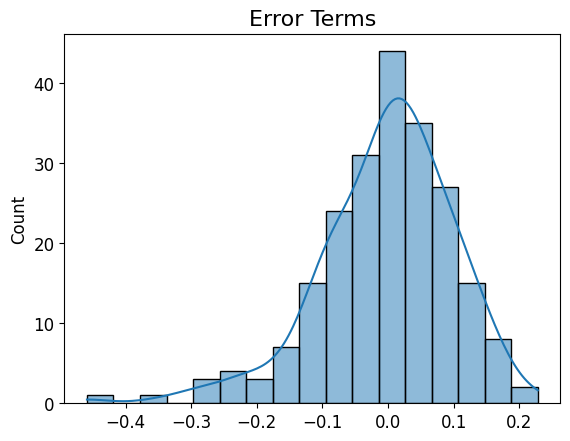

In [188]:
res_test = y_test - y_test_pred
plt.title('Error Terms', fontsize=16) 
sns.histplot(res_test,kde=True)
plt.show()

Text(0, 0.5, 'Residual')

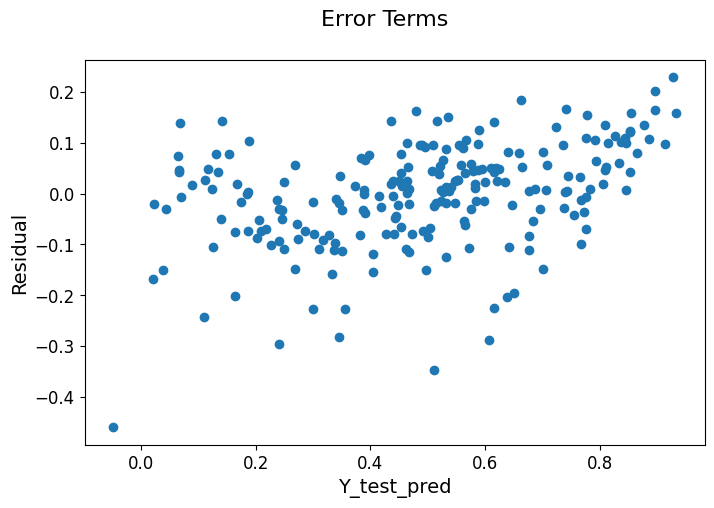

In [189]:
# The distribution plot of error term shows the normal distribution with mean at Zero.
# Error terms
fig = plt.figure(figsize=(8,5))
plt.scatter(y_test,res_test)
fig.suptitle('Error Terms', fontsize=16)              # Plot heading 
plt.xlabel('Y_test_pred', fontsize=14)                # X-label
plt.ylabel('Residual', fontsize=14)

Text(0, 0.5, 'y_test_pred')

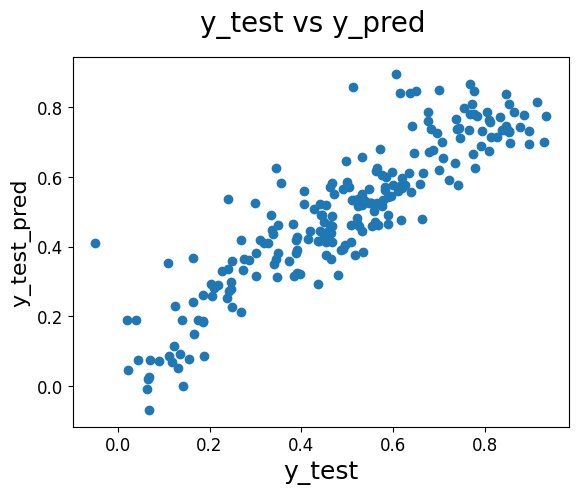

In [190]:
# It seems like the corresponding residual plot is reasonably random.
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

In [191]:
# We can colude that the model lm_5 fit isn't by chance, and has descent predictive power.
# Print R Squared and adj. R Squared

print('R- Sqaured train: ', round(lm_final.rsquared,2), '  Adj. R-Squared train:', round(lm_final.rsquared_adj,3) )
print('R- Sqaured test : ', round(r2_test,2), '  Adj. R-Squared test :', round(r2_test_adj,3))


# Print the coefficents of final varible

print('\nCoefficent for the variables are:')
print(round(lm_final.params,3))

R- Sqaured train:  0.82   Adj. R-Squared train: 0.81
R- Sqaured test :  0.8   Adj. R-Squared test : 0.785

Coefficent for the variables are:
const                             0.096
yr                                0.251
holiday                          -0.090
workingday                        0.008
temp                              0.583
windspeed                        -0.150
season_fall                      -0.010
season_winter                     0.115
mnth_mar                          0.060
mnth_apr                          0.090
mnth_jun                          0.033
mnth_sep                          0.088
mnth_oct                          0.051
weathersit_Mist_Cloudy           -0.081
weathersit_LightSnow_LightRain   -0.268
dtype: float64
